In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
df = pd.read_csv("E:\Data\Bengaluru House Price\Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [2]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [3]:
df1 = df.drop(['area_type','availability','society','balcony'], axis = 1)
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [4]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [5]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [6]:
df2.shape

(13246, 5)

In [7]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [8]:
df2['bhk'] = df2['size'].apply(lambda x: x.split(' ')[0])
df2

<ipython-input-8-fb90d717d69c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: x.split(' ')[0])


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [9]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [10]:
df2['bhk'] = pd.to_numeric(df2['bhk'], downcast = 'float')

<ipython-input-10-4c135783de79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = pd.to_numeric(df2['bhk'], downcast = 'float')


In [11]:
df2.total_sqft

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13246, dtype: object

In [12]:
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4.0
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2.0
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2.0
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2.0
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2.0
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3.0
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2.0
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2.0


In [13]:
def convert_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return(((float(tokens[0])) + (float(tokens[1])))/2)
    try:
        return(float(x))
    except:
        return None
    
        

In [14]:
df3 = df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convert_to_num)

### 

In [15]:
df3.head(31)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4.0
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4.0
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3.0
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6.0


In [16]:
df4 = df3.copy()

In [17]:
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0


In [18]:
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0,10407.336319


df4[

In [19]:
df4['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [20]:
len(df4['location'].unique())

1304

In [21]:
df4.location.apply(lambda x: x.strip())
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield                            534
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        266
Thanisandra                           233
                                     ... 
Konappana Agrahara                      1
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
 Anekal                                 1
Name: location, Length: 1304, dtype: int64

In [22]:
len(location_stats[location_stats<=10])

1063

In [23]:
location_less_than_10 = (location_stats[location_stats<=10])
location_less_than_10

location
Ganga Nagar                           10
Nagappa Reddy Layout                  10
BTM 1st Stage                         10
Dodsworth Layout                      10
Kalkere                               10
                                      ..
Konappana Agrahara                     1
Kodanda Reddy Layout                   1
Kirloskar layout, Basaveshwarnagar     1
Kengeri Satellite Town Stage II        1
 Anekal                                1
Name: location, Length: 1063, dtype: int64

In [24]:
df4.location = df4.location.apply(lambda x : 'other' if x in location_less_than_10 else x)

In [25]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0,10407.336319


In [26]:
len(df4.location.unique())

242

In [27]:
df4['bhk'] = pd.to_numeric(df4['bhk'], downcast = 'float')

In [28]:
df4[df4.total_sqft/df4.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000


In [29]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0,10407.336319


df5.price_per_sqft.describe()

In [30]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [31]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf.price_per_sqft > (m-std)) & (subdf.price_per_sqft<= (m+std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
df6 = remove_pps_outlier(df5)
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.00,3.0,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.00,2.0,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.00,2.0,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.00,2.0,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.00,3.0,4561.403509
...,...,...,...,...,...,...,...
10239,other,2 BHK,1353.0,2.0,110.00,2.0,8130.081301
10240,other,1 Bedroom,812.0,1.0,26.00,1.0,3201.970443
10241,other,3 BHK,1440.0,2.0,63.93,3.0,4439.583333
10242,other,2 BHK,1075.0,2.0,48.00,2.0,4465.116279


In [32]:
df6.shape

(10244, 7)

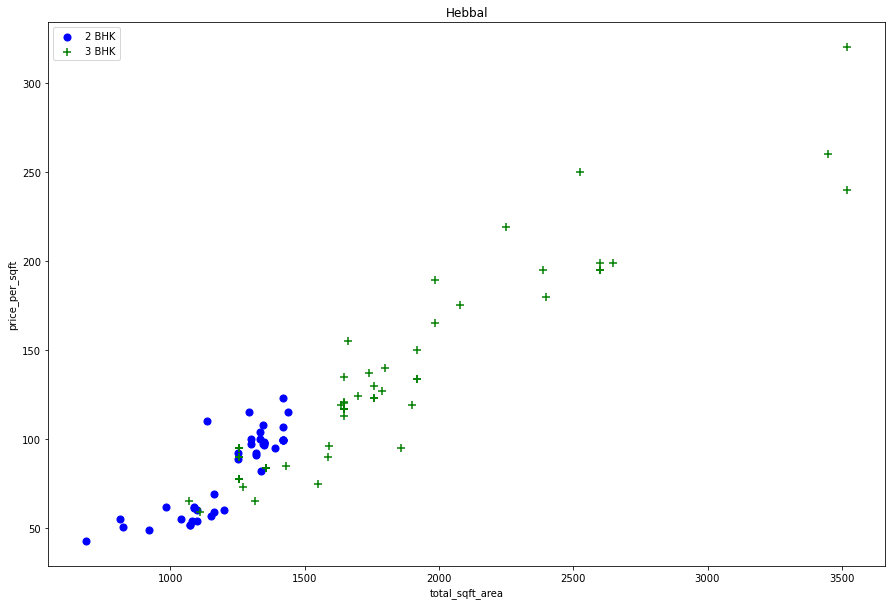

In [33]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s=50)
    plt.xlabel('total_sqft_area')
    plt.ylabel('price_per_sqft')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df6, 'Hebbal')

In [34]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
df7.shape

(7342, 7)

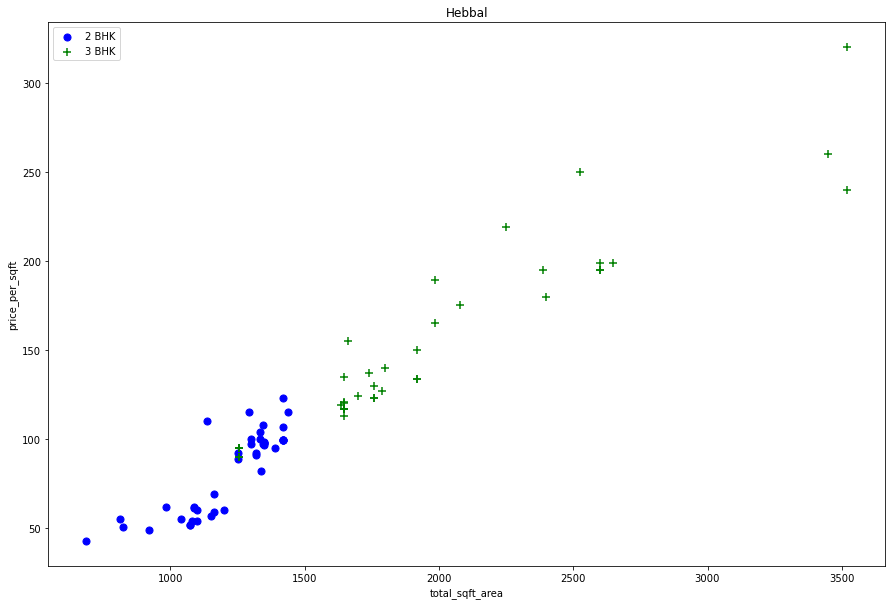

In [35]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = '+', color = 'green', label = '3 BHK', s=50)
    plt.xlabel('total_sqft_area')
    plt.ylabel('price_per_sqft')
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7, 'Hebbal')

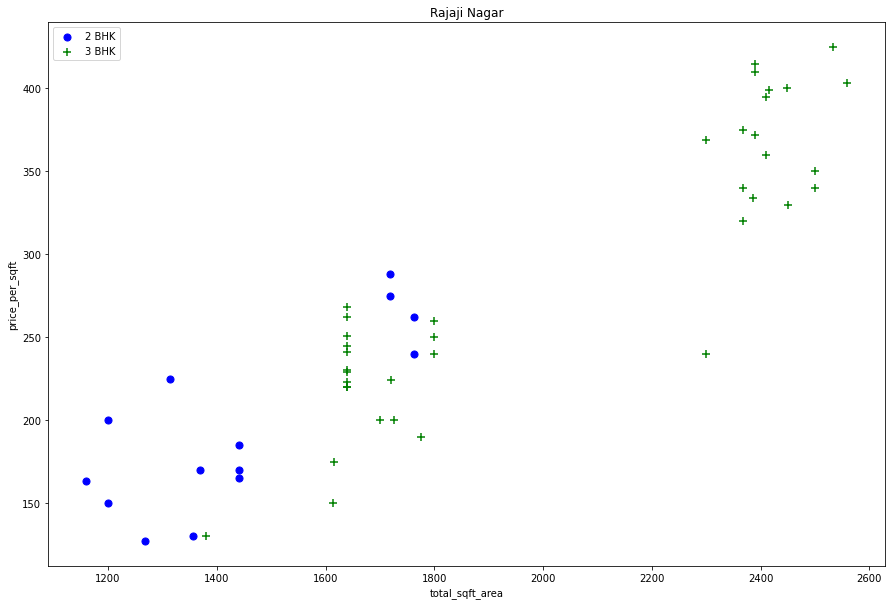

In [36]:
plot_scatter_chart(df6, 'Rajaji Nagar')

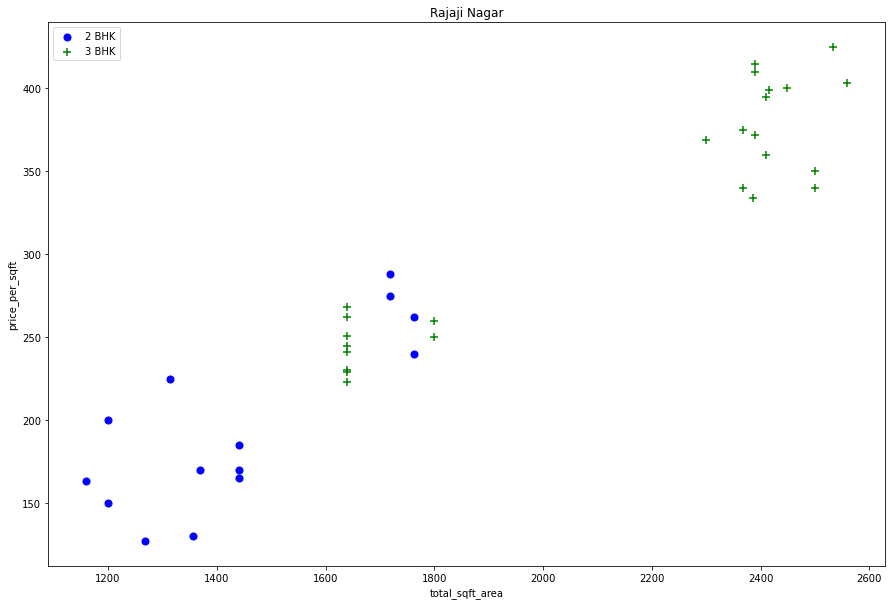

In [37]:
plot_scatter_chart(df7, 'Rajaji Nagar')

Text(0, 0.5, 'Count')

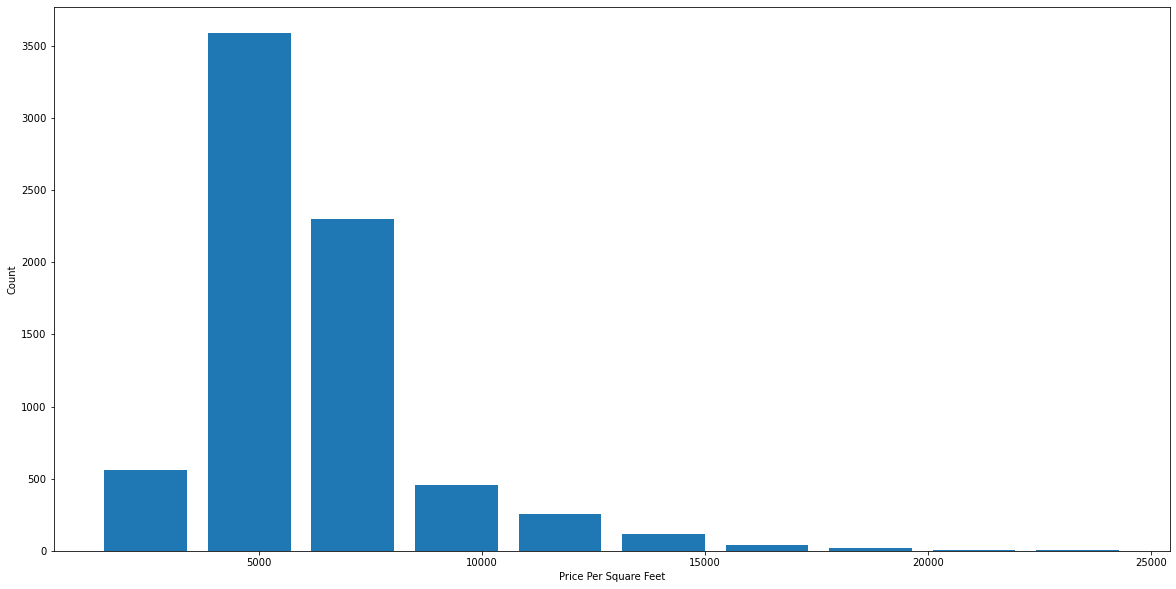

In [38]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [39]:
df7.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [40]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5271,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10.0,4000.000000
8481,other,10 BHK,12000.0,12.0,525.0,10.0,4375.000000
8570,other,16 BHK,10000.0,16.0,550.0,16.0,5500.000000
9309,other,11 BHK,6000.0,12.0,150.0,11.0,2500.000000
9641,other,13 BHK,5425.0,13.0,275.0,13.0,5069.124424


Text(0, 0.5, 'Count')

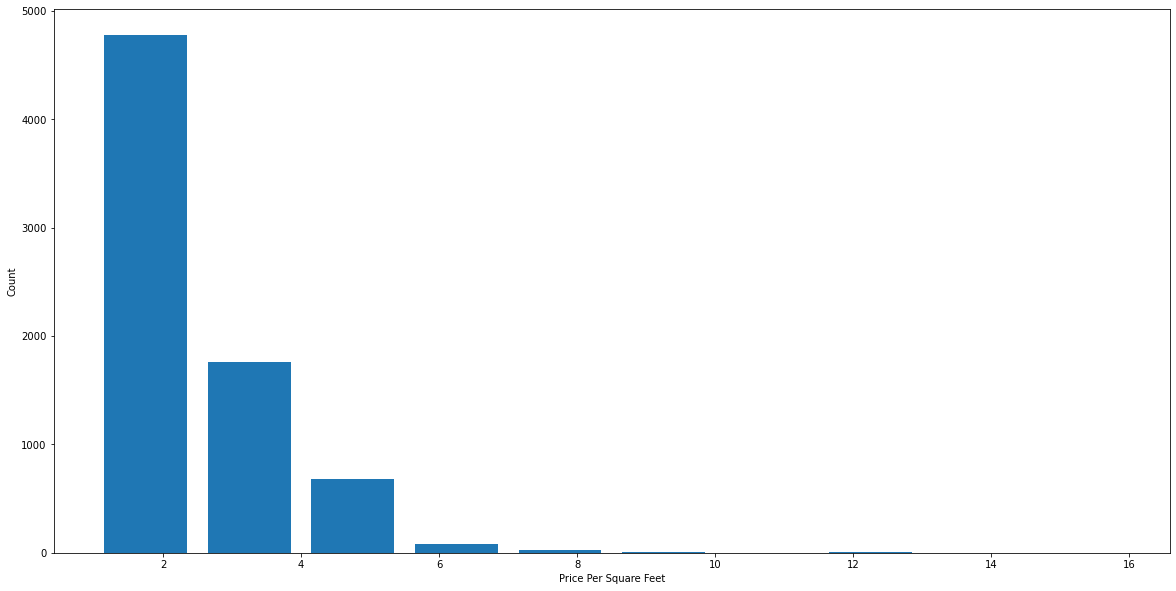

In [41]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [42]:
df7[df7.bath>df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.032520
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4.0,6428.571429
6702,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.034330
8405,other,6 BHK,11338.0,9.0,1000.0,6.0,8819.897689


In [43]:
df8 = df7[df7.bath<df7.bhk+2]
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2.0,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2.0,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2.0,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3.0,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2.0,4540.654699
...,...,...,...,...,...,...,...
10235,other,2 BHK,1200.0,2.0,70.0,2.0,5833.333333
10236,other,1 BHK,1800.0,1.0,200.0,1.0,11111.111111
10239,other,2 BHK,1353.0,2.0,110.0,2.0,8130.081301
10240,other,1 Bedroom,812.0,1.0,26.0,1.0,3201.970443


In [44]:
df8.shape

(7264, 7)

In [45]:
dummies = pd.get_dummies(df8.location)

In [46]:
df9 = pd.concat([df8,dummies.drop('other', axis = 'columns')], axis = 'columns')
df9

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2.0,3200.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2.0,6916.666667,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2.0,3418.803419,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3.0,4561.403509,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,2 BHK,947.0,2.0,43.0,2.0,4540.654699,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,other,2 BHK,1200.0,2.0,70.0,2.0,5833.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,other,1 BHK,1800.0,1.0,200.0,1.0,11111.111111,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,other,2 BHK,1353.0,2.0,110.0,2.0,8130.081301,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,other,1 Bedroom,812.0,1.0,26.0,1.0,3201.970443,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df10 = df9.drop(['location','size', 'price_per_sqft'], axis = 'columns')
df10

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,40.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,65.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,43.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,1200.0,2.0,70.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1800.0,1.0,200.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,1353.0,2.0,110.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,812.0,1.0,26.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
X = df10.drop('price', axis = 'columns')
X

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,1200.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1800.0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,1353.0,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10240,812.0,1.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y = df10.price
y

1         40.0
2         83.0
3         40.0
4         65.0
5         43.0
         ...  
10235     70.0
10236    200.0
10239    110.0
10240     26.0
10243    400.0
Name: price, Length: 7264, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [51]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)
linreg.score(X_test,y_test)

0.7696224927820575

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82622151, 0.81408431, 0.87757267, 0.84822717, 0.86091226])

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
                'model': algo_name,
                'best_score': gs.best_score_,
                'best_params': gs.best_params_
            })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.845404,{'normalize': False}
1,lasso,0.709577,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.697803,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [54]:
import pickle
with open ('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(linreg,f)

In [56]:
import json
columns = {'data_columns': [col.lower() for col in X.columns]}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))